## EDA analysing the windspeed and winddirection and its effect on the target

In [7]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import windrose as wr

In [4]:
# Load dataset
df = pd.read_csv('../data/GEFCom2014Data/Wind/clean_data.csv')

In [3]:
sns.set_theme()

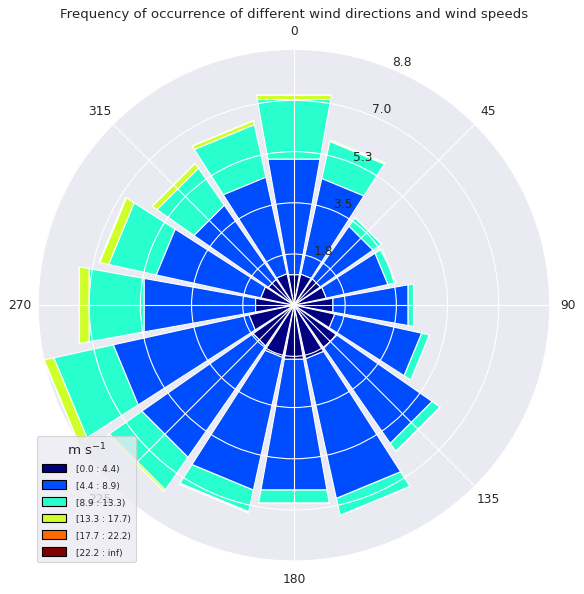

In [10]:
## Create windrose plot: frequency and wind speed by direction
ax = wr.WindroseAxes.from_ax(theta_labels = np.concatenate([np.arange(90,-45,-45),np.arange(315,90,-45)]))
ax.bar(df.WD100, df.WS100, normed = True, opening = .9, edgecolor = 'white')
ax.set_legend(title='$\mathregular{m\ s^{-1}}$')
ax.set_title('Frequency of occurrence of different wind directions and wind speeds')
plt.show()

Analysis by wind direction

In [13]:
# import the dataset without the dammuy variables for ```WD100CARD```
df_card = pd.read_csv('../data/GEFCom2014Data/Wind/raw_data_incl_features.csv')

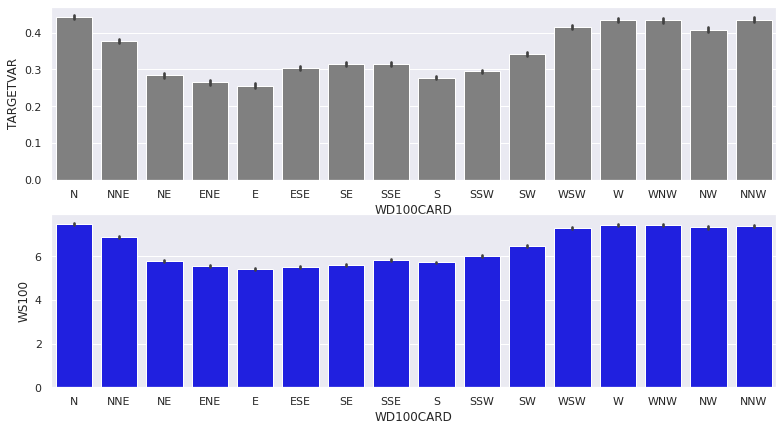

In [14]:
## wind power and wind speed by direction
order = ['N','NNE','NE','ENE','E','ESE','SE','SSE','S','SSW','SW','WSW','W','WNW','NW','NNW']
fig,ax = plt.subplots(2,1,figsize=(13,7))
sns.barplot(data = df_card, x = 'WD100CARD', y = 'TARGETVAR', order = order, ax=ax[0], color='gray');
sns.barplot(data = df_card, x = 'WD100CARD', y = 'WS100', order = order, ax=ax[1], color='blue');
